## **Title**

Exploratory Data Analysis for A/B Testing for optimization of e-Commerce website

## **Introduction**

This notebook explores the datasets users_df and sessions_df to uncover the patterns and prepare for hypothesis testing on image layout, CTA and social proof.

## **Data Loading**

In [ ]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load Datasets
users_df = pd.read_csv('/content/drive/MyDrive/data/users_data.csv')
sessions_df = pd.read_csv('/content/drive/MyDrive/data/sessions_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Overview**

A quick look at the structure and sample records from both the datasets.

### **Users Dataset**

In [ ]:
# Shape of the dataset
print("The shape of the Users Datasets is: ",users_df.shape)

# Prints information of the dataset
print("-----------------------------------------------------\n")
print("------------------------------------------------------")
print("Summary information of the Users Dataset")
print(users_df.info())

# Prints first 5 rows
print("-----------------------------------------------------\n")
print("------------------------------------------------------")
print("The first few rows from the dataset are: ")
print(users_df.head())

The shape of the Users Datasets is:  (75000, 8)
-----------------------------------------------------

------------------------------------------------------
Summary information of the Users Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             75000 non-null  object
 1   device_type         75000 non-null  object
 2   traffic_source      75000 non-null  object
 3   user_type           75000 non-null  object
 4   registration_date   75000 non-null  object
 5   image_layout_group  75000 non-null  object
 6   cta_button_group    75000 non-null  object
 7   social_proof_group  75000 non-null  object
dtypes: object(8)
memory usage: 4.6+ MB
None
-----------------------------------------------------

------------------------------------------------------
The first few rows from the dataset are: 
       user_id d

### **Sessions Dataset**

In [ ]:
# Shape of the dataset
print("The shape of the Sessions Datasets is: ",sessions_df.shape)

# Prints information of the dataset
print("-----------------------------------------------------\n")
print("------------------------------------------------------")
print("Summary information of the Users Dataset")
print(sessions_df.info())

# Prints first 5 rows
print("-----------------------------------------------------\n")
print("------------------------------------------------------")
print("The first few rows from the dataset are: ")
print(sessions_df.head())

The shape of the Sessions Datasets is:  (248033, 18)
-----------------------------------------------------

------------------------------------------------------
Summary information of the Users Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248033 entries, 0 to 248032
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   session_id                248033 non-null  object 
 1   user_id                   248033 non-null  object 
 2   session_date              248033 non-null  object 
 3   device_type               248033 non-null  object 
 4   traffic_source            248033 non-null  object 
 5   user_type                 248033 non-null  object 
 6   image_layout_group        248033 non-null  object 
 7   cta_button_group          248033 non-null  object 
 8   social_proof_group        248033 non-null  object 
 9   page_views                248033 non-null  float64
 10  session_

## **Feature Exploration**

### **Users Dataset**

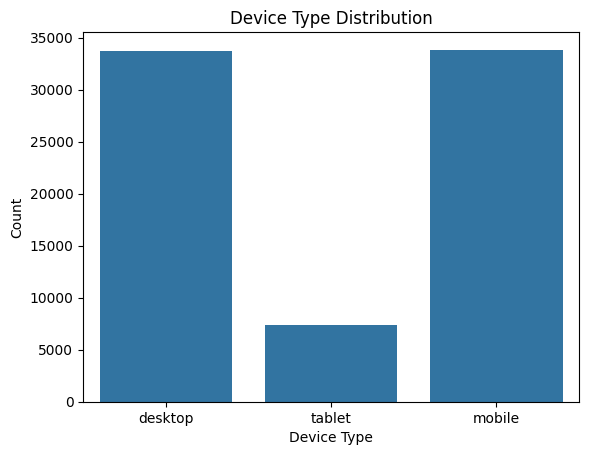

In [ ]:
# Device Type Distribution

sns.countplot(x = "device_type", data = users_df)
plt.title("Device Type Distribution")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.show()

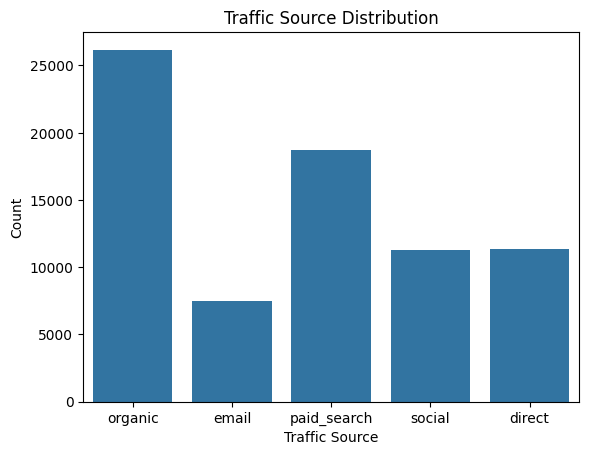

In [ ]:
# Traffic Source Distribution

sns.countplot(x ='traffic_source', data = users_df)
plt.title("Traffic Source Distribution")
plt.xlabel("Traffic Source")
plt.ylabel("Count")
plt.show()

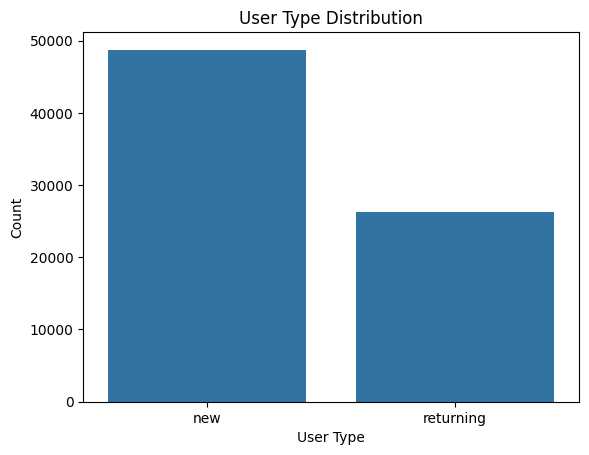

In [ ]:
# User Type Distribution

sns.countplot(x ='user_type', data = users_df)
plt.title("User Type Distribution")
plt.xlabel("User Type")
plt.ylabel("Count")
plt.show()

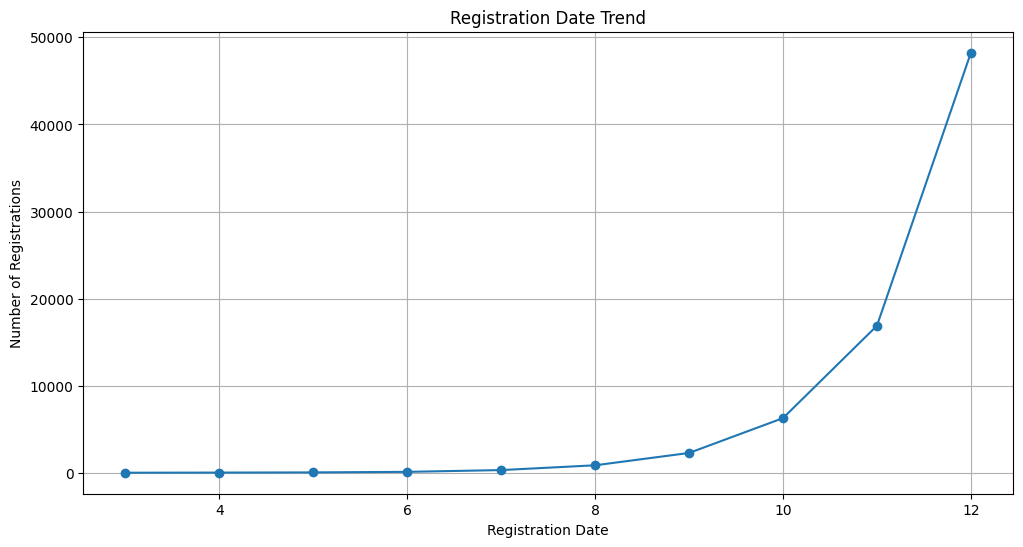

In [ ]:
# Registration Date Trend

users_df['registration_date'] = pd.to_datetime(users_df['registration_date'])
users_df['registration_month'] = users_df['registration_date'].dt.month

registration_trend = users_df['registration_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
registration_trend.plot(kind='line', marker='o', linestyle='-')
plt.title('Registration Date Trend')
plt.xlabel('Registration Date')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.show()


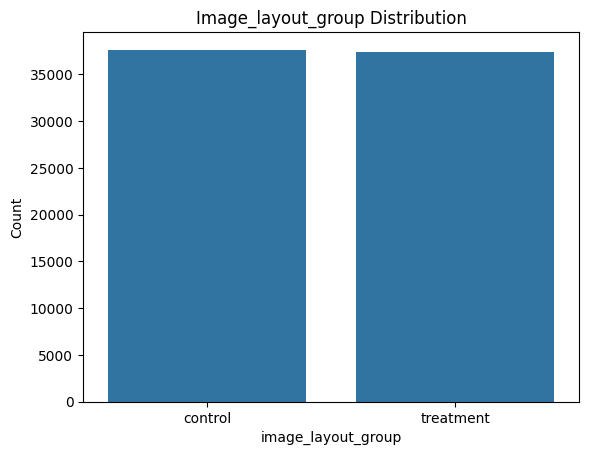

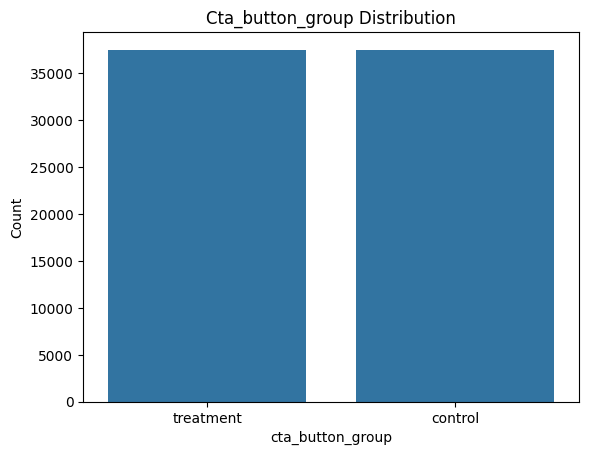

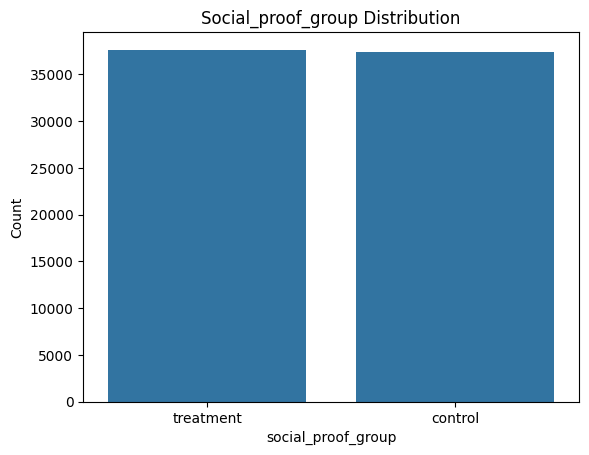

In [ ]:
# Assignment Distribution

for col in ['image_layout_group', 'cta_button_group', 'social_proof_group']:
    sns.countplot(x = col, data = users_df)
    plt.title(f"{col.capitalize()} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### **Sessions Dataset**

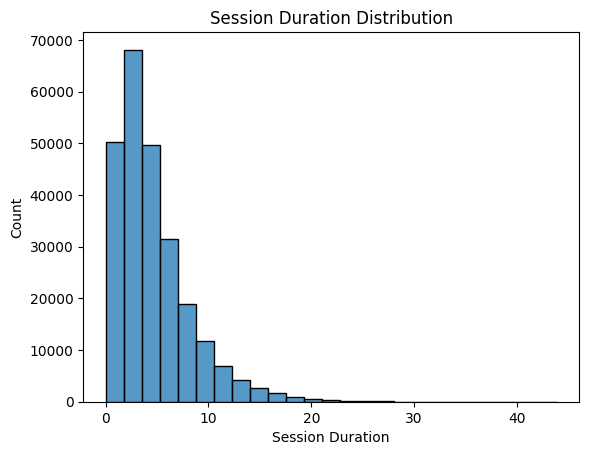

In [ ]:
# Session Duration Distribution

sns.histplot(x = 'session_duration_minutes', data = sessions_df, bins =25)
plt.title("Session Duration Distribution")
plt.xlabel("Session Duration")
plt.ylabel("Count")
plt.show()

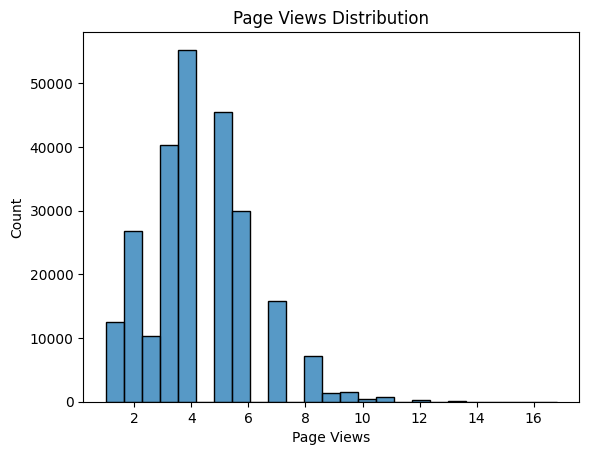

In [ ]:
# Page Views Distribution

sns.histplot(x = 'page_views', data = sessions_df, bins = 25)
plt.title("Page Views Distribution")
plt.xlabel("Page Views")
plt.ylabel("Count")
plt.show()

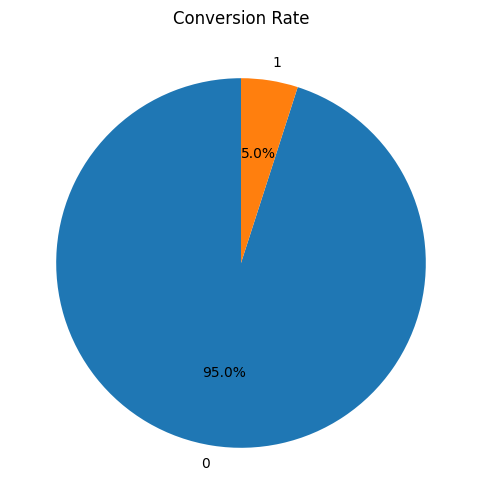

In [ ]:
# Conversion Rate


# Get counts for each category in 'converted'
counts = sessions_df['converted'].value_counts()
labels = counts.index.astype(str)

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%.1f%%', startangle=90)
plt.title("Conversion Rate")
plt.show()

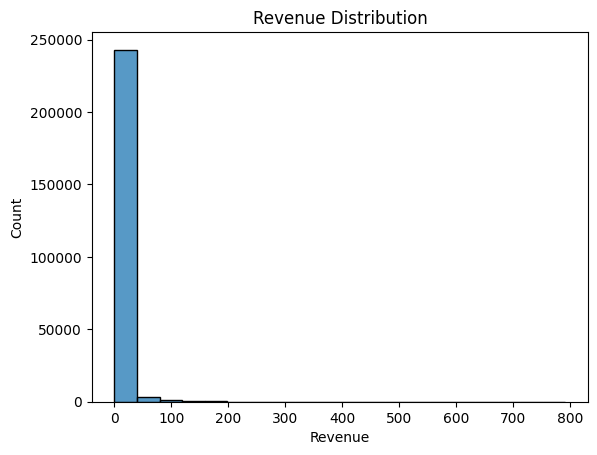

In [ ]:
# Revenue Distribution

sns.histplot(x = 'revenue', data = sessions_df, bins = 20)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.show()

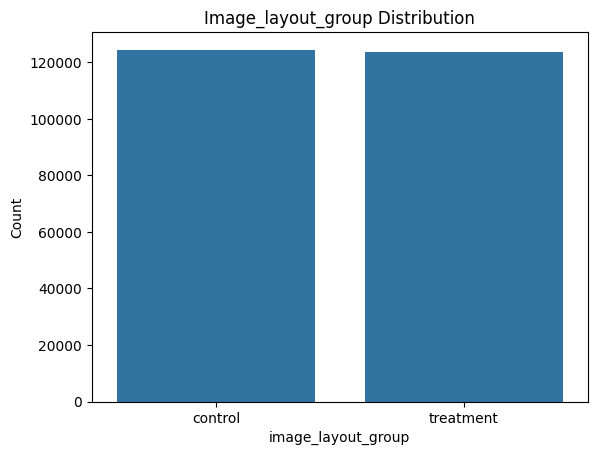

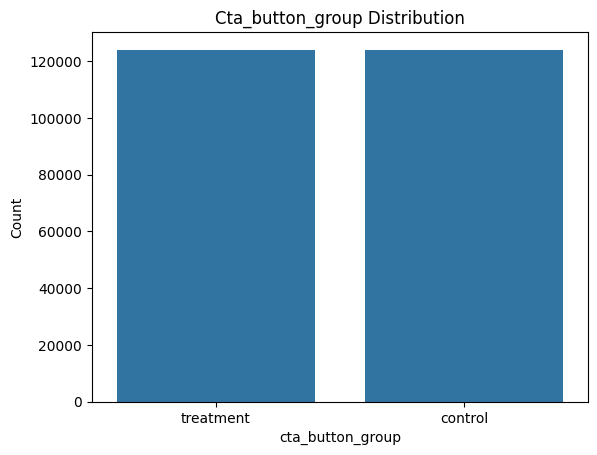

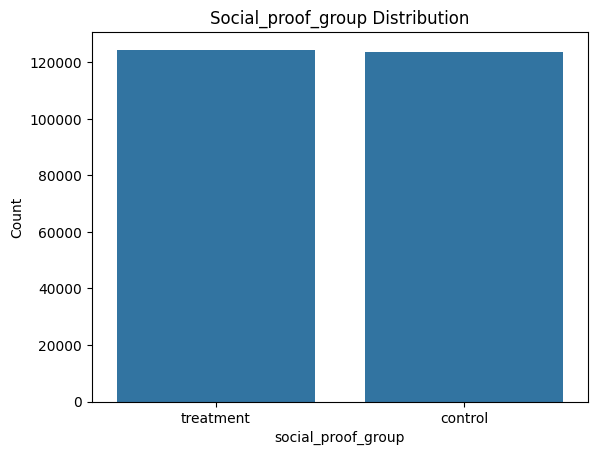

In [ ]:
# Assignment by Session

for col in ['image_layout_group', 'cta_button_group', 'social_proof_group']:
    sns.countplot(x = col, data = sessions_df)
    plt.title(f"{col.capitalize()} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

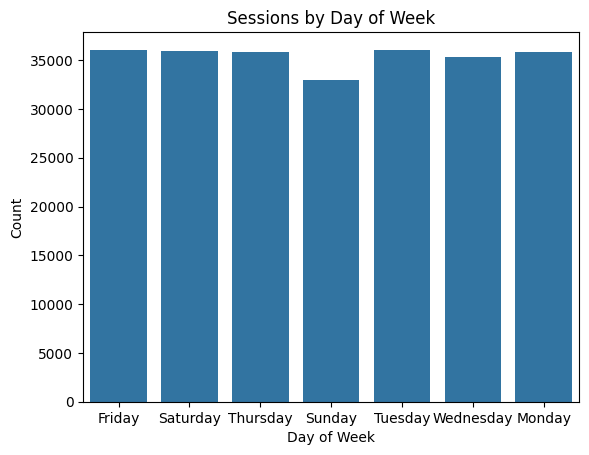

In [ ]:
# Sessions by Day of Week

sns.countplot(x = sessions_df['day_of_week'].astype(str))
plt.title("Sessions by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.show()

## **A/B Assignment Analysis**

In [ ]:
assignment_cols = ['image_layout_group', 'cta_button_group', 'social_proof_group']

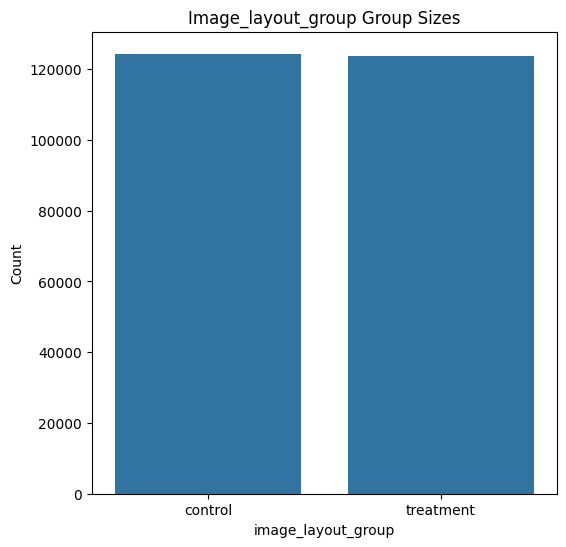

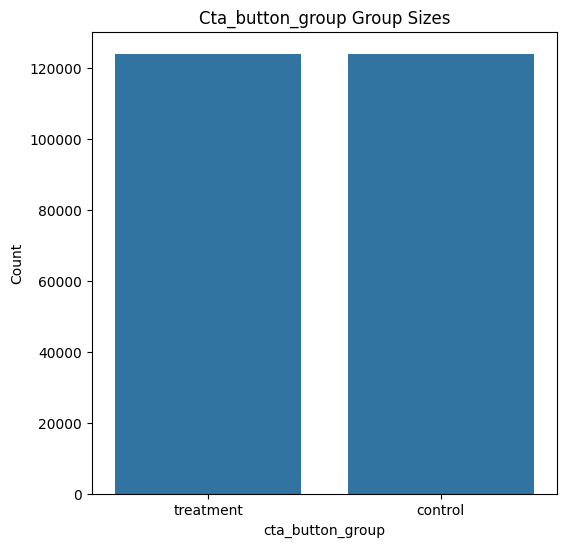

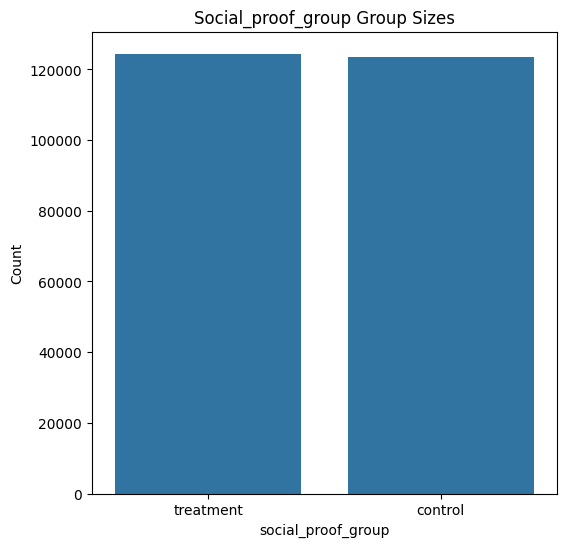

In [ ]:
# Plot Group Sizes

for col in assignment_cols:
  plt.figure(figsize=(6,6))
  sns.countplot(x = col, data = sessions_df)
  plt.title(f"{col.capitalize()} Group Sizes")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

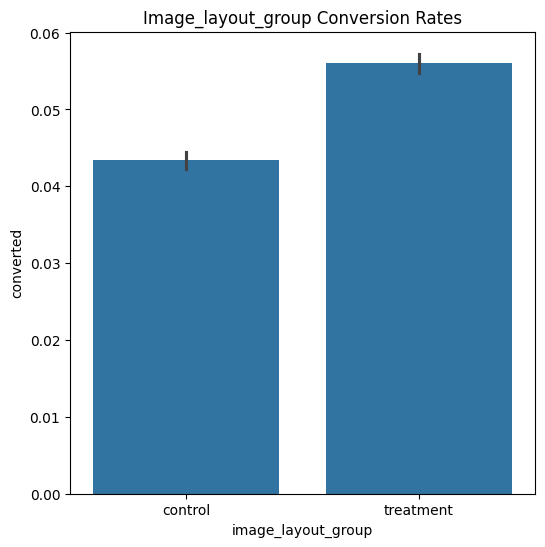

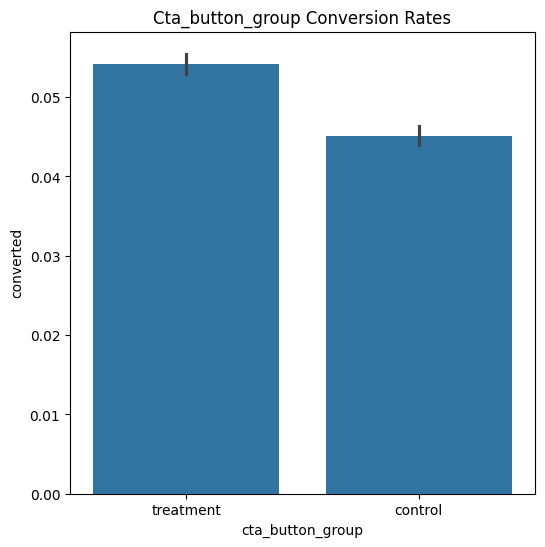

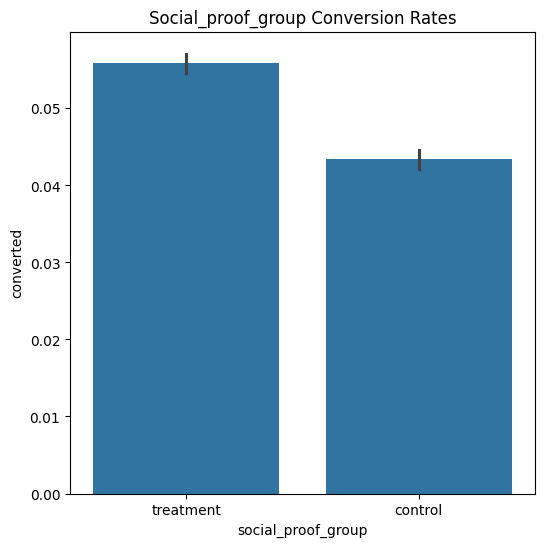

In [ ]:
# Plot Conversion rates by group

for col in assignment_cols:
  plt.figure(figsize=(6,6))
  sns.barplot(x = col, y = 'converted', data = sessions_df, estimator = lambda x : sum(x)/len(x))
  plt.title(f"{col.capitalize()} Conversion Rates")
  plt.xlabel

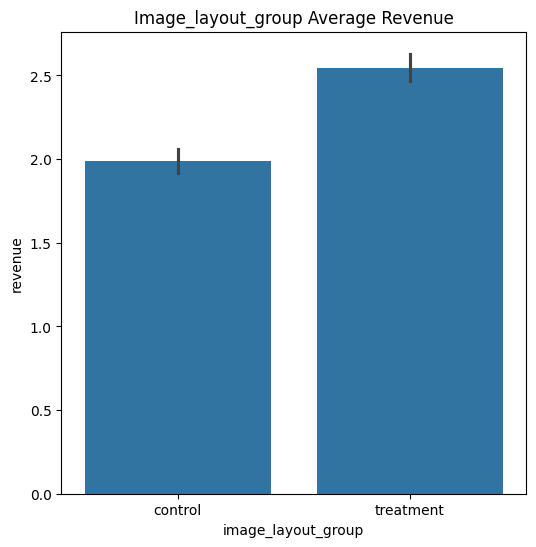

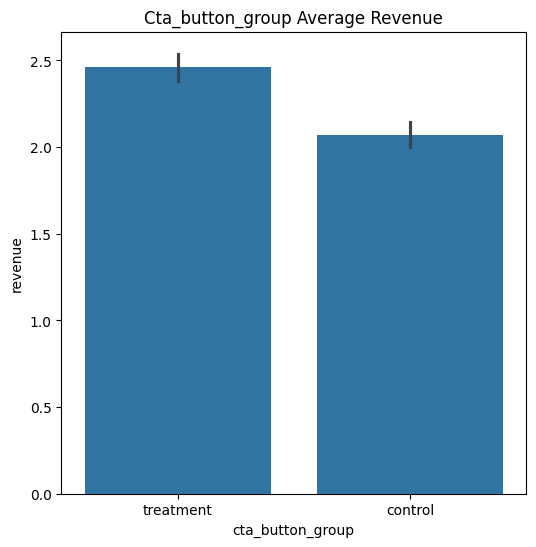

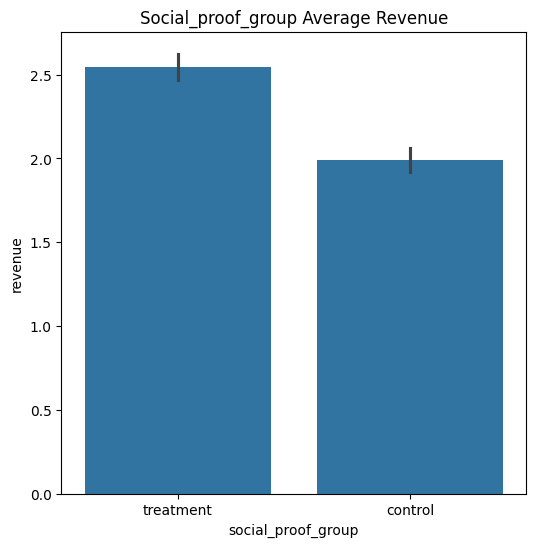

In [ ]:
# Average Revenue by Groups

for col in assignment_cols:
  plt.figure(figsize=(6,6))
  sns.barplot(x = col, y = 'revenue', data = sessions_df)
  plt.title(f"{col.capitalize()} Average Revenue")
  plt.xlabel(col)

## **Relationships and Insights**

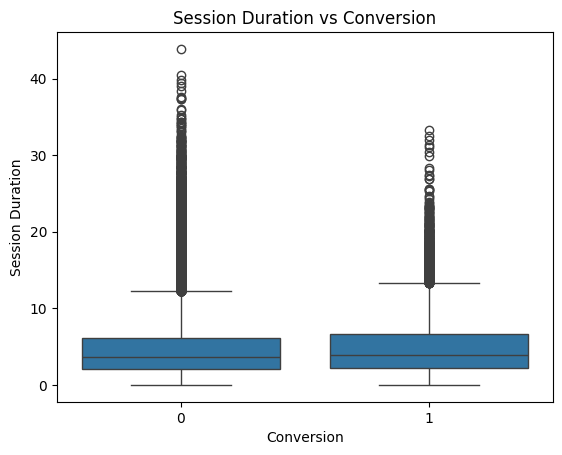

In [ ]:
# Session Duration vs Conversion

sns.boxplot(x = 'converted', y = 'session_duration_minutes', data = sessions_df)
plt.title("Session Duration vs Conversion")
plt.xlabel("Conversion")
plt.ylabel("Session Duration")
plt.show()

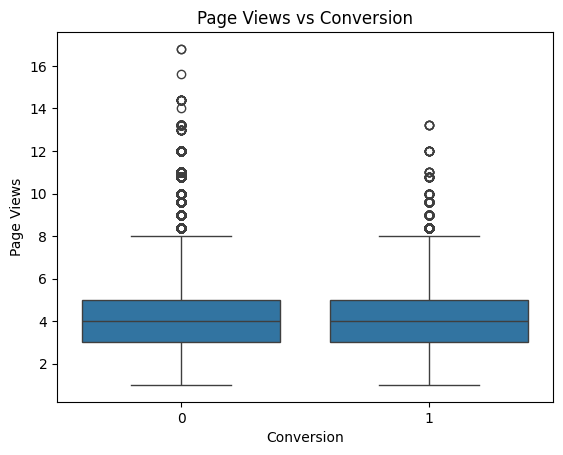

In [ ]:
# Page Views vs Conversion

sns.boxplot(x = 'converted', y = 'page_views', data = sessions_df)
plt.title("Page Views vs Conversion")
plt.xlabel("Conversion")
plt.ylabel("Page Views")
plt.show()

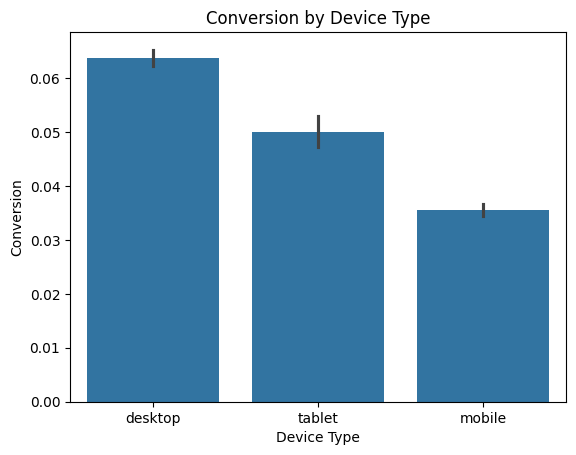

In [ ]:
# Conversion by Device Type

sns.barplot(x = 'device_type', y = 'converted', data = sessions_df)
plt.title("Conversion by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Conversion")
plt.show()

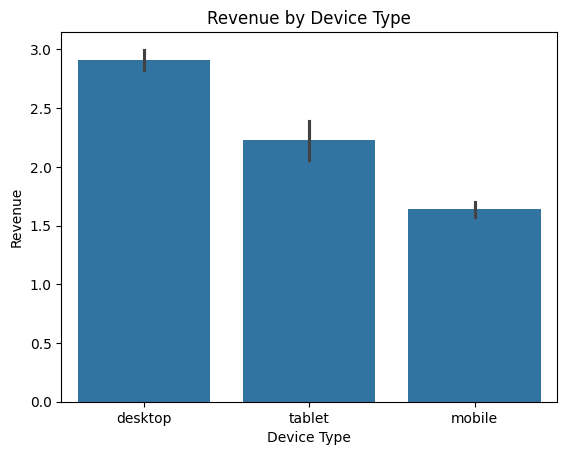

In [ ]:
# Revenue by Device Type

sns.barplot(x = 'device_type', y = 'revenue', data = sessions_df)
plt.title("Revenue by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Revenue")
plt.show()

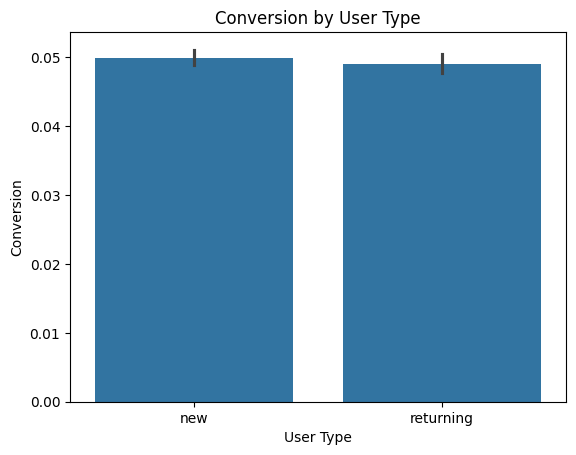

In [ ]:
# Conversion by User Type

sns.barplot(x = 'user_type', y = 'converted', data = sessions_df)
plt.title("Conversion by User Type")
plt.xlabel("User Type")
plt.ylabel("Conversion")
plt.show()

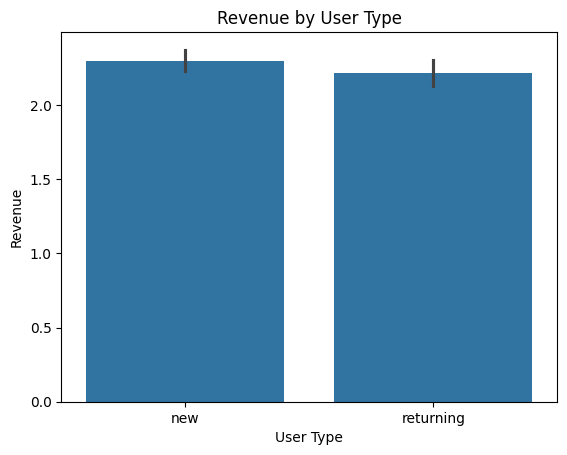

In [ ]:
# Revenue by User Type

sns.barplot(x = 'user_type', y = 'revenue', data = sessions_df)
plt.title("Revenue by User Type")
plt.xlabel("User Type")
plt.ylabel("Revenue")
plt.show()

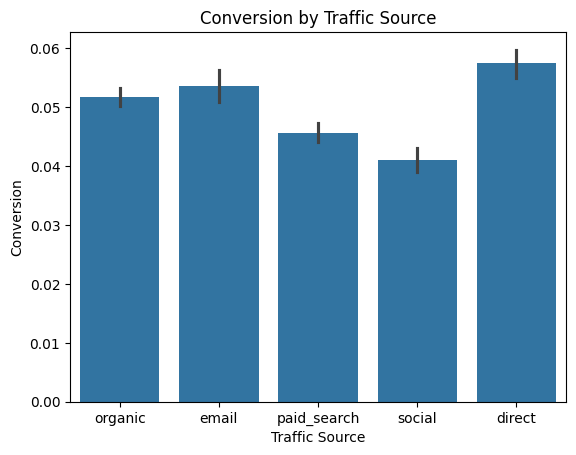

In [ ]:
# Conversion by traffic source

sns.barplot(x = 'traffic_source', y = 'converted', data = sessions_df)
plt.title("Conversion by Traffic Source")
plt.xlabel("Traffic Source")
plt.ylabel("Conversion")
plt.show()

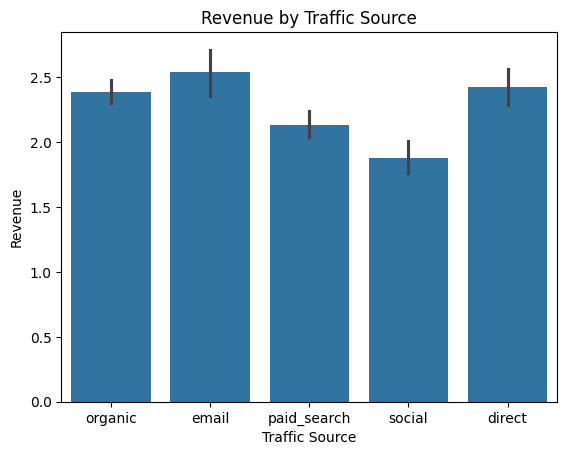

In [ ]:
# Revenue by Traffic Source

sns.barplot(x = 'traffic_source', y = 'revenue', data = sessions_df)
plt.title("Revenue by Traffic Source")
plt.xlabel("Traffic Source")
plt.ylabel("Revenue")
plt.show()

## **Conclusion**

The patterns and group differences observed in this EDA aligns well with the business assumptions and logic defined during data generation. As these data is synthetic, these insights are expected and serve to confirm the dataset is structured correctly for subsequent A/B analysis